# Regression

CREDIT: This practical was inspired from [this notebook on regression](https://www.kaggle.com/code/caesarmario/ww2-temperatures-w-linear-regression/notebook).

## Setup
### Imports

In [1]:
import string

import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
import time                                             # for execution time measurement
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Loading the dataset

Today's dataset is the [Weather Conditions in World War Two](https://www.kaggle.com/datasets/smid80/weatherww2) dataset.

In [2]:
df = pd.read_csv("Summary of Weather.csv")

<ipython-input-2-ce9a816bd962>:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Summary of Weather.csv")


## Observing the dataset

Using what you have learned in the previous lessons, examine the dataset and see what you can learn about it. In the cells underneath, write any information that seems relevant to you. Focus in particular on the understanding of what the dataset and its columns contain.

In today's practical, we will try to predict the value of `MaxTemp`. Which feature(s) seem more adapted to perform this task, and why?

**Answer**

This dataset consists of 119 040 observations with 31 features. Each observation provides information on meteorological conditions of a certain date during WW2, measured by different weather stations.

The best correlations with "MaxTemp" are obtained for "MinTemp" and for "MeanTemp" (cf. pairplots above).
As "MeanTemps" might be calculated only with "MinTemp" and "Maxtemp", the purpose of the notebook might be to predict "MaxTemp" with "MinTemp" at least. Other interesting features for the prediction are "MO", "YR" and "STA".

In [3]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df.shape)
print(df.isna().sum())

(119040, 31)
STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64


In [5]:
# Deleting features with too much missing values, redundant features, and absurd observations ("MinTemp">"Maxtemp")

df_clean = df.drop(["WindGustSpd", "TSHDSBRSGF", "PGT", "FT", "DR", "FB", "FTI", "ITH", "SD3", "RHX", "RHN", "RVG", "WTE","PoorWeather","Date","SPD","MAX","MIN","MEA","SND"], axis='columns')
df_clean = df_clean.drop(df_clean[df_clean['MinTemp'] > df_clean['MaxTemp']].index)

print(df_clean.shape)

(119008, 11)


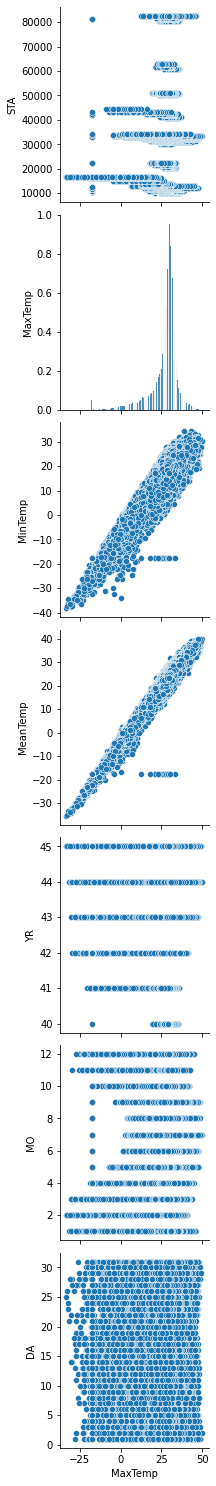

In [6]:
sns.pairplot(df_clean, x_vars="MaxTemp", height=3)

## Preparing the data

We will be performing regression on the `MaxTemp` feature, using the `MinTemp` feature only.
In the following cell:
1. Define the input (X) and output (y) of the regression.
2. Using `scikit-learn`'s `train_test_split` function, separate X and y into training and test sets. Make it so that 80% of the data is used for training, and 20% for testing. 
3. Why do we typically want to maximise the data used for training?

**Answers**

1. (Cf. cell below).
2. (Cf. cell below).
3. More data for training enables the algorithm to "learn" more and have the potential to make better predictions.

In [7]:
X = df_clean.MinTemp
y = df_clean.MaxTemp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Performing regression

1. Using the observations you made above, justify which regression model is best fit for this task.
2. Using `scikit-learn`, train this regression model on the training set.
3. Give the formula of the regression model.
4. Display the regression model on a graph along with your test set. Comment on what you see.

**Answers**

1. The previous graphs show that "MinTemp" and "MaxTemp" seem to be linearly correlated.
2. (Cf. code below)
3. MaxTemp = 10.7 + 0.92*MinTemp
4. The regression is globally satisfying. However, there are vertically aligned points around MinTemp = -18 that seem abnormal. Deleting these observations might increase the precision of the regression.

In [8]:
model = LinearRegression()
model.fit(X_train.to_numpy().reshape(-1, 1), y_train.to_numpy().reshape(-1, 1))

print(model.coef_, model.intercept_)

[[0.91844905]] [10.71849265]


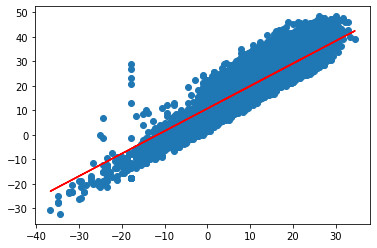

In [9]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test.to_numpy().reshape(-1, 1),), c = 'red')

## Evaluating the model

Let us consider three metrics: MAE, MSE, RMSE. For each of these, answer the following questions:
1. What does the acronym mean?
2. What does the metric measure?
3. What are the pros and cons compared to the other two metrics?
4. Using their implementation in `scikit-learn`, measure the performance of your regression model.

After measuring all three metrics, interpret your results.

**Answers**

1. MAE means "Mean Absolute Error", MSE means "Mean Squared Error" and RMSE means "Root Mean Squared Error"
2. MAE is the average of absolute errors of the prediction, MSE is the average of squared errors of the prediction and RMSE is simply the root square of MSE.
3. MAE and RMSE are easier to interpret as they are in the same unit as the original data, contrary to MSE. MSE and RMSE are more sensitive to outliers than MAE.
4. In these conditions, the prediction of the model will be off by 3 Celsius degrees on average from the real MaxTemp value (cf. code below).

In [10]:
y_pred = model.predict(X_test.to_numpy().reshape(-1,1))

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f" MAE = {mae} / MSE ={mse} / RMSE = {rmse}")

 MAE = 3.1506807559313694 / MSE =16.690172542455173 / RMSE = 4.085360760380309
